In [1]:
import pandas as pd

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [5]:
print("Period\\Unit:")

Period\Unit:


In [6]:
exchange_rates.rename(columns = {"[US dollar ]":"US_dollar","Period\\Unit:":"Time"}, inplace = True)

In [7]:
euro_to_dollar = exchange_rates[["Time","US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts() # - 62 characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.3740     1
1.3691     1
1.3847     1
1.3984     1
1.1659     1
Name: US_dollar, Length: 3528, dtype: int64

In [8]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)

In [9]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       5637 non-null   object 
 1   US_dollar  5637 non-null   float64
dtypes: float64(1), object(1)
memory usage: 132.1+ KB


In [10]:
euro_to_dollar["Time"] = pd.to_datetime(euro_to_dollar["Time"])

In [11]:
import matplotlib.pyplot as plt

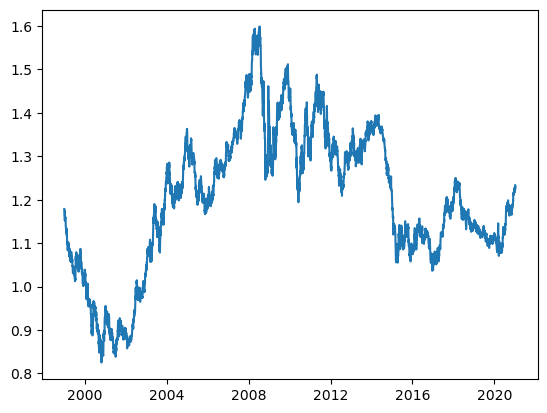

In [12]:
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])

plt.show()

In [13]:
euro_to_dollar["US_dollar"].rolling(5).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4       1.22862
         ...   
5694    1.16290
5695    1.16248
5696    1.16246
5697    1.16786
5698    1.17226
Name: US_dollar, Length: 5637, dtype: float64

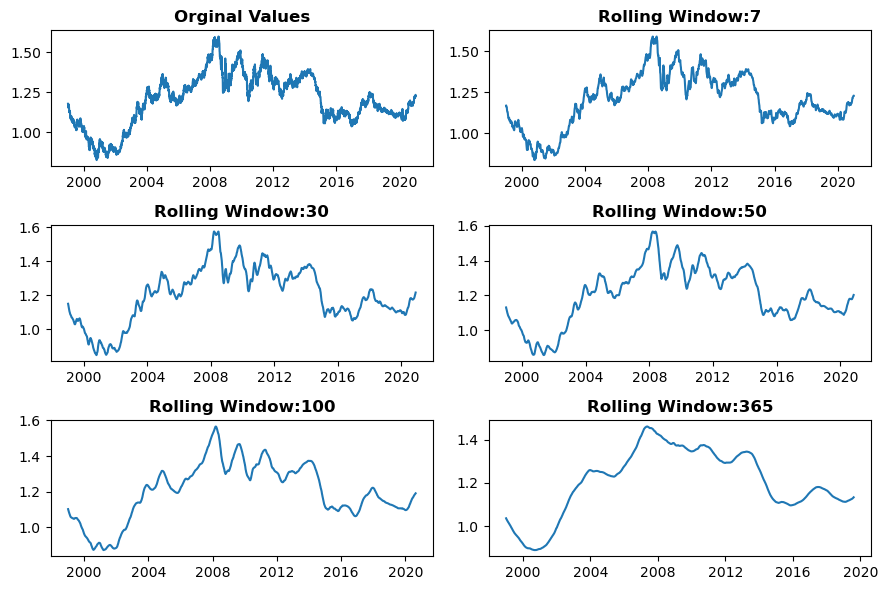

In [14]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.title("Orginal Values", weight = "bold")

for i,rolling_mean in zip([2,3,4,5,6], [7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window:" + str(rolling_mean), weight = "bold")
plt.tight_layout()
plt.show()

In [15]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()
euro_to_dollar.head(3)

,Time,US_dollar,rolling_mean
0,2021-01-08,1.2250,NaN
1,2021-01-07,1.2276,NaN
2,2021-01-06,1.2338,NaN


In [16]:
financial_crisis = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2006) & (euro_to_dollar["Time"].dt.year <= 2009)] 

In [17]:
financial_crisis_7_8 = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2007) & (euro_to_dollar["Time"].dt.year <= 2008)] 

(array([13149., 13330., 13514., 13695., 13879., 14061., 14245., 14426.,
        14610.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

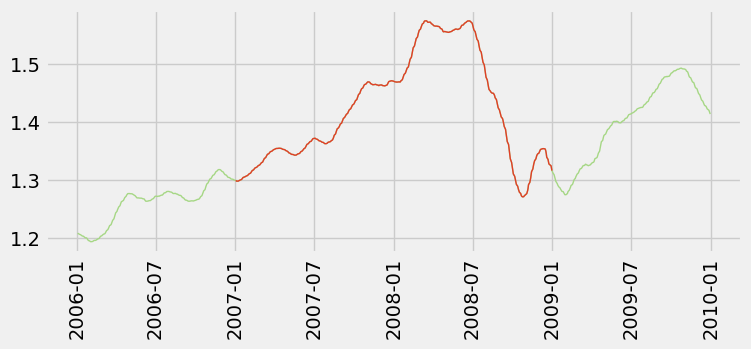

In [26]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 1, color = "#e23d28")


plt.xticks(rotation = 90)

C:\Users\techm\AppData\Local\Temp\ipykernel_12936\916567120.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["2006","","2007","","2008","","2009","","2010"], alpha = 0.3)


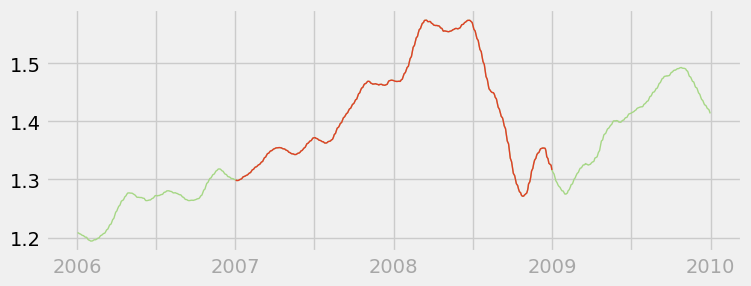

In [29]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 1, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels(["2006","","2007","","2008","","2009","","2010"], alpha = 0.3)

plt.show()

[Text(13149.0, 0, '2006'), Text(13330.0, 0, ''), Text(13514.0, 0, '2007'), Text(13695.0, 0, ''), Text(13879.0, 0, '2008'), Text(14061.0, 0, ''), Text(14245.0, 0, '2009'), Text(14426.0, 0, ''), Text(14610.0, 0, '2010')]


C:\Users\techm\AppData\Local\Temp\ipykernel_12936\2952158351.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  print(ax.set_xticklabels(["2006","","2007","","2008","","2009","","2010"], alpha = 0.3))


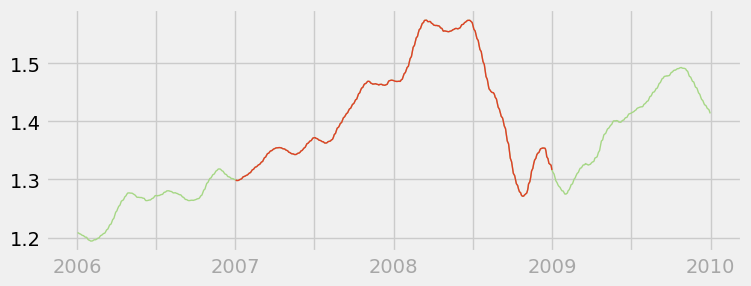

In [30]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 1, color = "#e23d28")


# plt.xticks(rotation = 90)

print(ax.set_xticklabels(["2006","","2007","","2008","","2009","","2010"], alpha = 0.3))

plt.show()

[Text(0, 1.1, ''), Text(0, 1.2000000000000002, ''), Text(0, 1.3, ''), Text(0, 1.4000000000000001, ''), Text(0, 1.5, ''), Text(0, 1.6, '')]


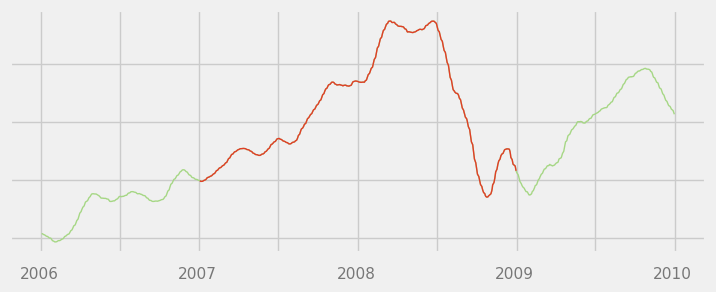

In [42]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 1, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels([])

x = 13100.0

for year in ["2006", "2007","2008","2009","2010"]:
    ax.text(x, 1.13 , year, alpha = 0.5, fontsize = 11)
    x+=365

    
print(ax.set_yticklabels([]))

plt.show()

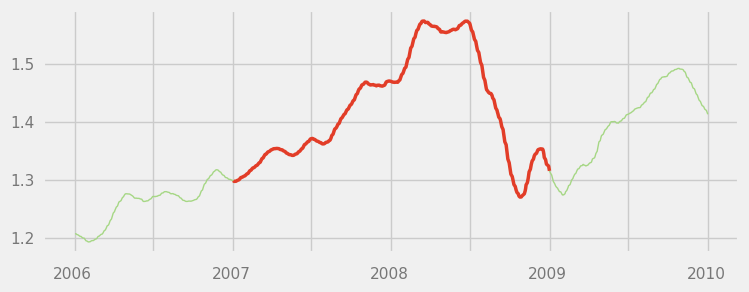

In [50]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 2.5, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels([])

x = 13100.0

for year in ["2006", "2007","2008","2009","2010"]:
    ax.text(x, 1.13 , year, alpha = 0.5, fontsize = 11)
    x+=365

ax.set_yticklabels([])
    
y = 1.19
for rate in ["1.2","1.3","1.4","1.5"]:
    ax.text(13000.0, y, rate, fontsize = 11, alpha = 0.5)
    y += 0.1

plt.show()

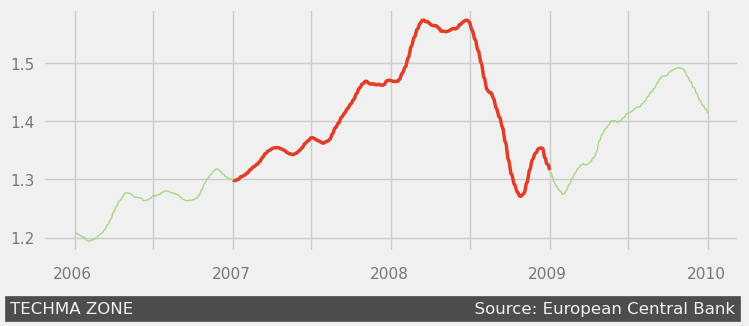

In [59]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 2.5, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels([])

x = 13100.0

for year in ["2006", "2007","2008","2009","2010"]:
    ax.text(x, 1.13 , year, alpha = 0.5, fontsize = 11)
    x+=365

ax.set_yticklabels([])
    
y = 1.19
for rate in ["1.2","1.3","1.4","1.5"]:
    ax.text(13000.0, y, rate, fontsize = 11, alpha = 0.5)
    y += 0.1

    
ax.text(13000.0, 1.07, "TECHMA ZONE" + " "*65 + "Source: European Central Bank", color = "#f0f0f0", 
        backgroundcolor = "#4d4d4d", size =  12)

plt.show()

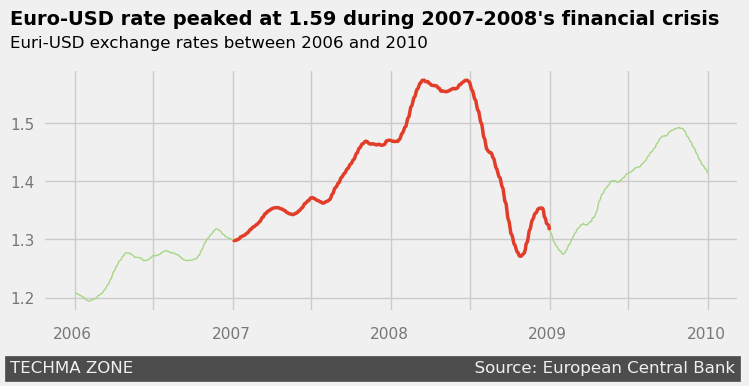

In [64]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 2.5, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels([])

x = 13100.0

for year in ["2006", "2007","2008","2009","2010"]:
    ax.text(x, 1.13 , year, alpha = 0.5, fontsize = 11)
    x+=365

ax.set_yticklabels([])
    
y = 1.19
for rate in ["1.2","1.3","1.4","1.5"]:
    ax.text(13000.0, y, rate, fontsize = 11, alpha = 0.5)
    y += 0.1

    
ax.text(13000.0, 1.07, "TECHMA ZONE" + " "*65 + "Source: European Central Bank", color = "#f0f0f0", 
        backgroundcolor = "#4d4d4d", size =  12)

ax.text(13000.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight = "bold")
ax.text(13000.0, 1.63, "Euri-USD exchange rates between 2006 and 2010", size = 12)

plt.show()

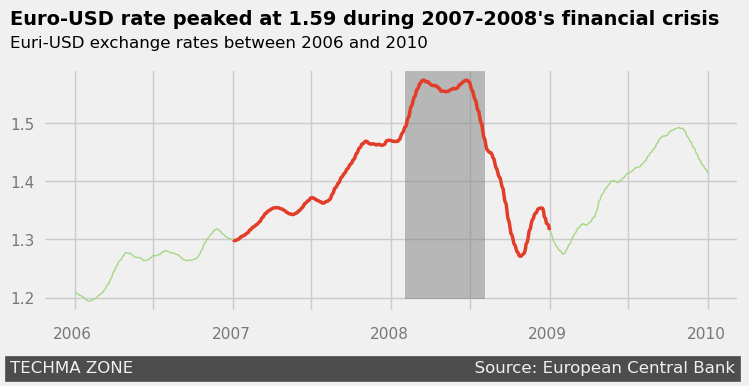

In [79]:
import matplotlib.style as style
style.use("fivethirtyeight")

fig , ax = plt.subplots(figsize = (8,3))


ax.plot(financial_crisis["Time"], financial_crisis["rolling_mean"], linewidth = 1, color = "#A6D785")


ax.plot(financial_crisis_7_8["Time"], financial_crisis_7_8["rolling_mean"], linewidth = 2.5, color = "#e23d28")


# plt.xticks(rotation = 90)

ax.set_xticklabels([])

x = 13100.0

for year in ["2006", "2007","2008","2009","2010"]:
    ax.text(x, 1.13 , year, alpha = 0.5, fontsize = 11)
    x+=365

ax.set_yticklabels([])
    
y = 1.19
for rate in ["1.2","1.3","1.4","1.5"]:
    ax.text(13000.0, y, rate, fontsize = 11, alpha = 0.5)
    y += 0.1

    
ax.text(13000.0, 1.07, "TECHMA ZONE" + " "*65 + "Source: European Central Bank", color = "#f0f0f0", 
        backgroundcolor = "#4d4d4d", size =  12)

ax.text(13000.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight = "bold")
ax.text(13000.0, 1.63, "Euri-USD exchange rates between 2006 and 2010", size = 12)


ax.axvspan(xmin = pd.to_datetime("2008-02-1"), xmax = pd.to_datetime("2008-08-1"), color = "grey", alpha = 0.5, ymin = 0.06)

plt.show()

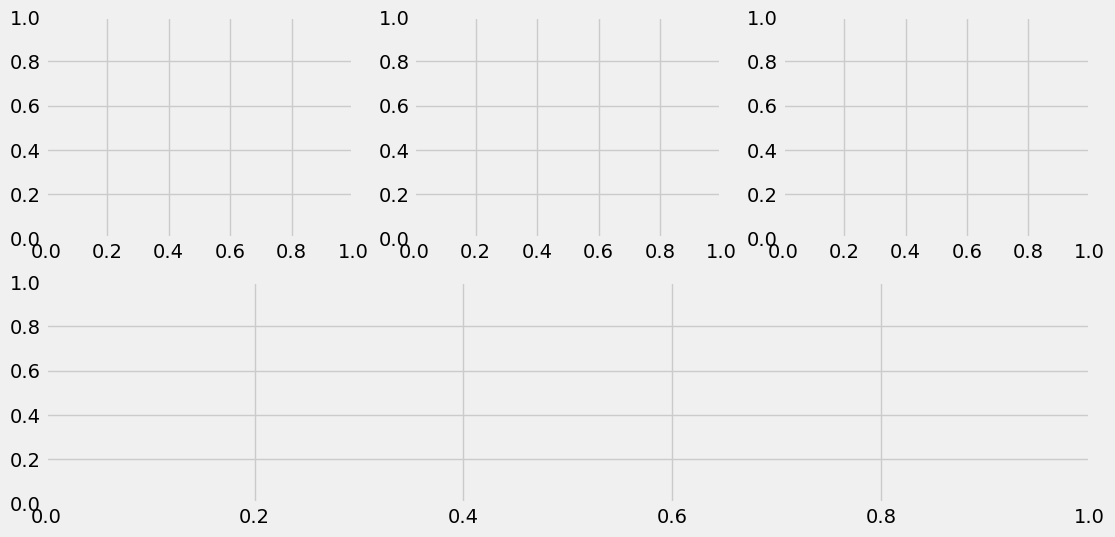

In [86]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax4 = plt.subplot(2,1,2)

In [87]:
bush_obama_trump = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2001) & (euro_to_dollar["Time"].dt.year <= 2021)]
bush = euro_to_dollar[(euro_to_dollar["Time"].dt.year <= 2009)]
obama = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2009) & (euro_to_dollar["Time"].dt.year >= 2017)]
trump = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2017) & (euro_to_dollar["Time"].dt.year >= 2021)]

C:\Users\techm\AppData\Local\Temp\ipykernel_12936\2628153563.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',


Text(12200.0, 1.8, '(2001-2009)')

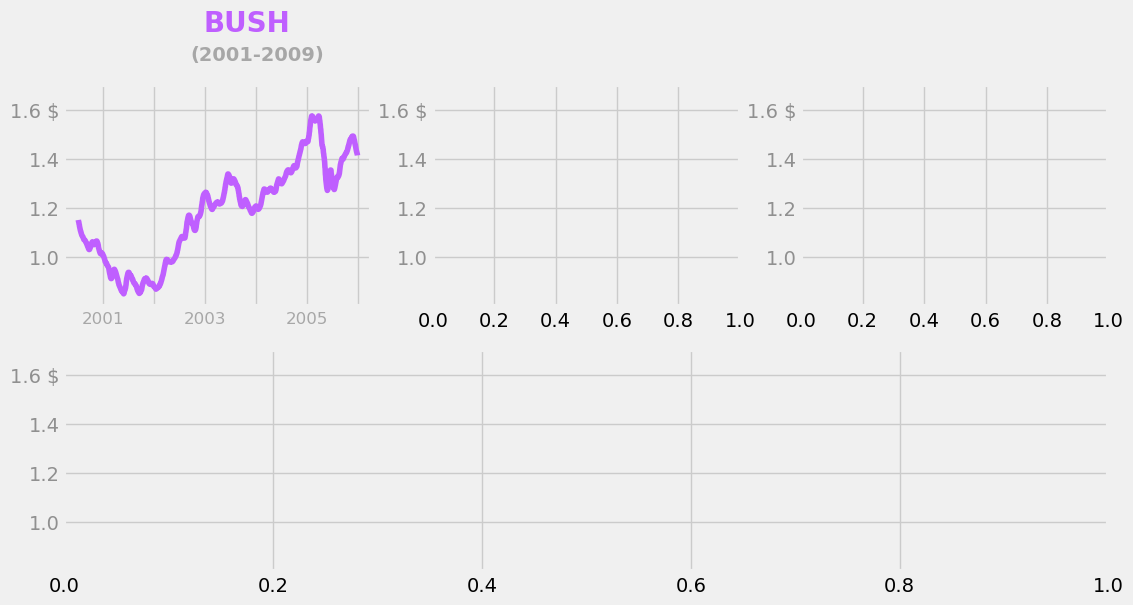

In [94]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax4 = plt.subplot(2,1,2)

axes = [ax1,ax2,ax3,ax4]

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(["1.0","1.2","1.4","1.6 $"], alpha = 0.4)
    

ax1.plot(bush['Time'], bush['rolling_mean'],
 color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
 '2007', '', '2009'],
 alpha=0.3, size = 12)
ax1.text(12400.0, 1.92, 'BUSH', fontsize=20, weight='bold',
 color='#BF5FFF')
ax1.text(12200.0, 1.8, '(2001-2009)', weight='bold',
 alpha=0.3)


C:\Users\techm\AppData\Local\Temp\ipykernel_12936\4097579326.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
C:\Users\techm\AppData\Local\Temp\ipykernel_12936\4097579326.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
C:\Users\techm\AppData\Local\Temp\ipykernel_12936\4097579326.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
C:\Users\techm\AppData\Local\Temp\ipykernel_12936\4097579326.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


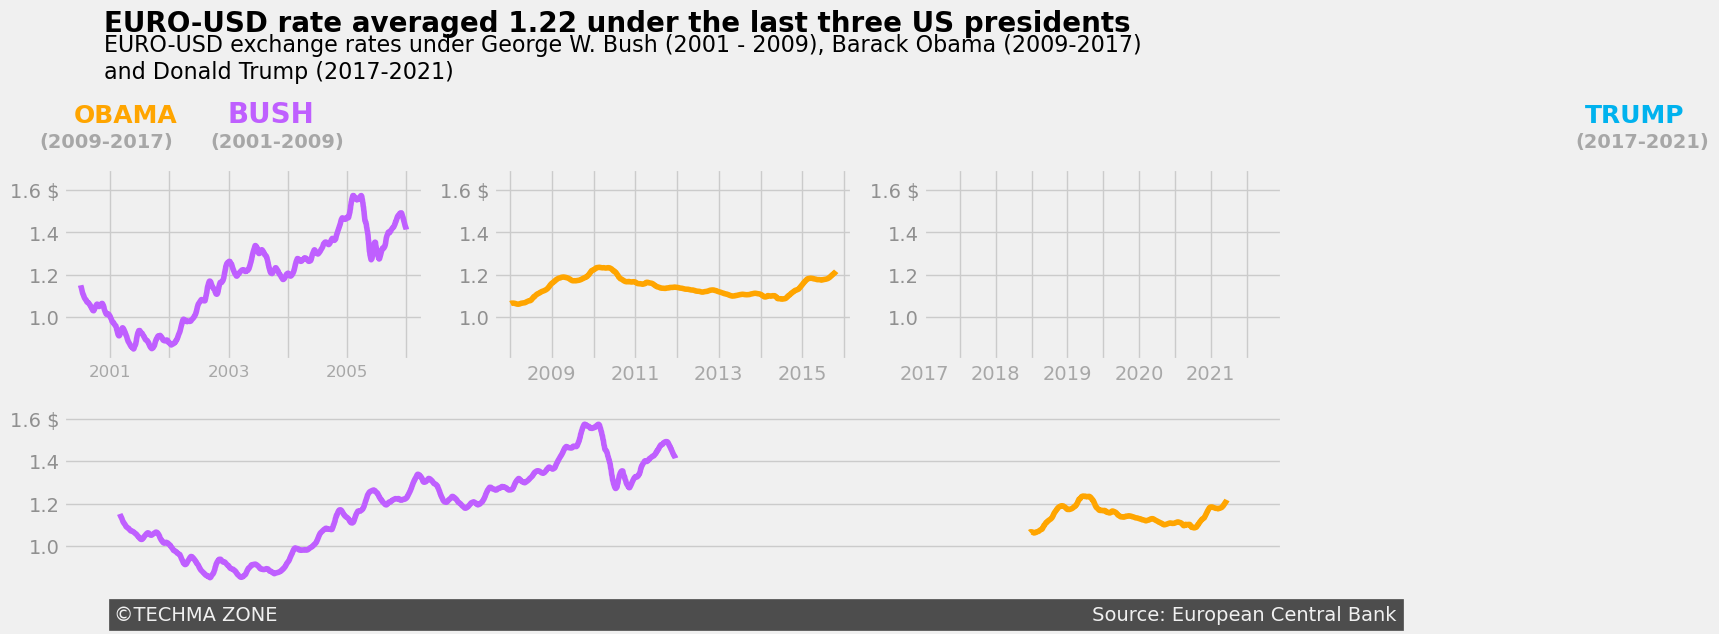

In [95]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')
### Adding the subplots
plt.figure(figsize=(14, 8))
# pattern 1
ax1 = plt.subplot(3,3,1) # row, col, index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
# pattern 2
ax4 = plt.subplot(3,1,2) # row, col, index
axes = [ax1, ax2, ax3, ax4]
### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6 $'],
    alpha=0.4)


### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
 color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
 '2007', '', '2009'],
 alpha=0.3, size = 12)
ax1.text(12400.0, 1.92, 'BUSH', fontsize=20, weight='bold',
 color='#BF5FFF')
ax1.text(12200.0, 1.8, '(2001-2009)', weight='bold',
 alpha=0.3)
### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
 color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
 '2015', '', '2017'],
 alpha=0.3)
ax2.text(15256.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
 color='#ffa500')
ax2.text(15106.0, 1.8, '(2009-2017)', weight='bold',
 alpha=0.3)
### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
 color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
 '2020', '', '2021'],
 alpha=0.3)
ax3.text(17697.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
 color='#00B2EE')
ax3.text(17597.0, 1.8, '(2017-2021)', weight='bold',
 alpha=0.3)
### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
 color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
 color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
 color='#00B2EE')
ax4.set_xticks([])
### Adding a title and a subtitle
ax1.text(10879.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
 fontsize=20, weight='bold')
ax1.text(10879.0, 2.13, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017)
and Donald Trump (2017-2021)''',
 fontsize=16)
### Adding a signature
ax4.text(10557.0, 0.65, '©TECHMA ZONE' + ' '*133 + 'Source: European Central Bank',
 color = '#f0f0f0', backgroundcolor = '#4d4d4d',
 size=14)
plt.tight_layout()
